## Project Title: 

### Leveraging Data Insights for Sales Optimization in 2019

## 1. Business Understanding


### 1.1. Introduction
In this project, we aim to design and deliver an end-to-end business intelligence solution leveraging transactional data from 2019 to provide valuable insights for our client. The client has collected data throughout the year but hasn't utilized it effectively to drive sales and improve operational efficiency. Our goal is to analyze the data comprehensively and present actionable insights that will enable the client to identify opportunities for growth and optimization.

### 1.2. Objectives
The main objectives of this project are as follows:

- Analyze the 2019 transactional data to determine the total revenue generated throughout the year.

- Identify any seasonal patterns or trends in sales to understand the seasonality of the business.

- Determine the best-selling and worst-selling products based on sales volume and revenue.

- Compare sales performance across different months or weeks to identify trends and fluctuations.

- Analyze the distribution of product deliveries across cities to identify key markets.

- Compare product categories in terms of revenue generated and quantities ordered to understand their contribution to overall sales.

### 1.3. Analytical  Questions
1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered?

### 1.4. Hypothesis
- Null Hypothesis (H0): The total revenue generated in 2019 is equal to or less than a predetermined benchmark or expectation.

- Alternative Hypothesis (H1): The total revenue generated in 2019 is greater than the predetermined benchmark or expectation.

### 1.5. Methodology
To achieve these objectives, we will follow a systematic methodology that includes the following steps:

1. Data Collection: Retrieve transactional data for the entire year of 2019 from both CSV files (January to June) and the remote database (July to December).

2. Data Preprocessing: Clean and preprocess the data to handle missing values, outliers, and inconsistencies.

3. Exploratory Data Analysis (EDA): Conduct exploratory data analysis to gain insights into the distribution, trends, and patterns within the data.

4. Statistical Analysis: Perform statistical analysis to answer specific questions such as total revenue, seasonal trends, best-selling products, etc.

6. Data Visualization: Visualize the findings using charts, graphs, and tables to facilitate understanding and interpretation.

7. Interpretation and Insights: Provide actionable insights and recommendations based on the analysis to help the client make informed decisions.

8. Report Generation: Prepare a comprehensive report summarizing the analysis, findings, and recommendations for the client's reference.


By following this methodology, we aim to deliver a robust business intelligence solution that empowers our client to optimize sales strategies, identify growth opportunities, and enhance operational efficiency.

## 2. Data Understanding

### 2.1. Data Description

####  Features
1. Order ID	- This feature represents a unique identifier for each order.
2. Product	- This feature represents the name or type of product ordered.
3. Quantity Ordered	- This feature represents the quantity of each product ordered
4. Price Each - This feature represents the price of each product.
5. Order Date - This feature represents the date and time when the order was placed
6. Purchase Address - This feature represents the address where the purchase was made


#### Numerical features
1. Quantity Ordered
2.  Price Each

#### Categorical features
1.  Order ID
2. Product
3. Purchase Address

#### Date features
1. Order Date

Installing libraries and Packages


In this section we will import all the packages/libraries that we will be using through this project

### 2.2. Importation


In [87]:
# Data Handling
import pandas as pd  # For data manipulation and analysis using DataFrames
import numpy as np  # For numerical operations and arrays
import pyodbc  # For handling connections to Microsoft SQL Server
from dotenv import dotenv_values  # For loading environment variables, possibly including database credentials
import os

# Statistical Analysis
import math  # Basic mathematical operations

# Warning Handling
import warnings  # To handle warnings in a way that they can be ignored
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

### 2.3. Data Collection

#### 2.3.1. Load First Dataset (CSV Dataset)

In [88]:

# Directory path where CSV files for January to June are located
directory_path = r"../data"

# List of file names for each month
file_names = [
    "Sales_January_2019.csv",
    "Sales_February_2019.csv",
    "Sales_March_2019.csv",
    "Sales_April_2019.csv",
    "Sales_May_2019.csv",
    "Sales_June_2019.csv"
]

# Generate file paths for each month
file_paths = [os.path.join(directory_path, file_name) for file_name in file_names]

# Load CSV files into separate DataFrames
data_frames = [pd.read_csv(file) for file in file_paths]

# Combine DataFrames into a single DataFrame
first_half_data = pd.concat(data_frames, ignore_index=True)

# View first half of the dataset
first_half_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### 2.3.2. Load Second Dataset (from remote SQL Database)

In [89]:
# Load environment variables from .env file into a dictionary
config = dotenv_values("../.env")

# Get the values for the credentials set in the '.env' file
server = config.get("SERVER")
database = config.get("DATABASE")
username = config.get("USERNAME")
password = config.get("PASSWORD")

# Connection string
connection_string = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Establish a connection
connection = pyodbc.connect(connection_string)

In [90]:
# Define SQL queries
sql_queries = [
    'SELECT * FROM dbo.Sales_August_2019',
    'SELECT * FROM dbo.Sales_July_2019',
    'SELECT * FROM dbo.Sales_September_2019',
    'SELECT * FROM dbo.Sales_October_2019',
    'SELECT * FROM dbo.Sales_November_2019',
    'SELECT * FROM dbo.Sales_December_2019'
]

# Execute queries and fetch data into DataFrames
data_frames = []
for sql_query in sql_queries:
    df = pd.read_sql(sql_query, connection)
    data_frames.append(df)

# Combine DataFrames into a single DataFrame
second_half_data = pd.concat(data_frames, ignore_index=True)

# View second half of the dataset
second_half_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00,"736 14th St, New York City, NY 10001"


## 3. Data Preparation

### 3.1. Data Cleaning

#### 3.1.1. Standardize columns for both datasets.

In [91]:
# Display the columns for the first half of the dataframe
first_half_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [92]:
# Display the columns for the second half of the dataframe
second_half_data.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

- The first half seems to have column names like 'Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date','Purchase Address, while the second half has column names like 'Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date','Purchase_Address.
- we need to standardize the column names first.

In [93]:
# Rename columns of the first half of the dataset
first_half_data.columns = ['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date', 'Purchase_Address']
first_half_data.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

#### 3.1.2. Concatenate Dataset

In [94]:
# Concatenate the two halves along the rows axis
full_year_data = pd.concat([first_half_data, second_half_data], ignore_index=True)

# Display the combined dataset
full_year_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### 3.1.3. Check data structure

In [95]:
full_year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


* From the table above we can observe the number of values in each column and the datatype as well.
* The datatype of Order ID, Quantity Ordered, Price Each, and Order Date are wrong and must be changed to their correct form.
* Other features will be generated and others will be dropped to ensure an accurate dataset for the purpose of this analysis.

In [96]:
f'There are {full_year_data.shape[0]} rows and {full_year_data.shape[1]} columns in the dataset.'

'There are 186850 rows and 6 columns in the dataset.'

#### 3.1.4. Handle missing values

In [97]:
# Check null values in the dataset
full_year_data.isnull().sum()

Order_ID            740
Product             545
Quantity_Ordered    740
Price_Each          740
Order_Date          740
Purchase_Address    545
dtype: int64

In [98]:
# Confirm rows with null values in the dataset
missing_values = first_half_data[full_year_data.columns].isnull().any(axis=1)
rows_with_missing_values = first_half_data[missing_values]
rows_with_missing_values.head(50)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
1491,NaN,NaN,NaN,NaN,NaN,NaN
1699,NaN,NaN,NaN,NaN,NaN,NaN
3047,NaN,NaN,NaN,NaN,NaN,NaN
3082,NaN,NaN,NaN,NaN,NaN,NaN
3584,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
rows_with_missing_values.tail(20)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
78221,NaN,NaN,NaN,NaN,NaN,NaN
79484,NaN,NaN,NaN,NaN,NaN,NaN
80030,NaN,NaN,NaN,NaN,NaN,NaN
80054,NaN,NaN,NaN,NaN,NaN,NaN
80134,NaN,NaN,NaN,NaN,NaN,NaN
80373,NaN,NaN,NaN,NaN,NaN,NaN
80999,NaN,NaN,NaN,NaN,NaN,NaN
81356,NaN,NaN,NaN,NaN,NaN,NaN
82758,NaN,NaN,NaN,NaN,NaN,NaN
82979,NaN,NaN,NaN,NaN,NaN,NaN


* Since the rows with missing values in the dataset have all columns to be missing, we cannot impute the missing values hence we will drop the null values in the dataset.

In [100]:
# Drop null values
full_year_data.dropna(inplace=True)

# Check null values to confirm dropping of the null values
full_year_data.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

#### 3.1.5 Remove duplicates

In [101]:
# Check duplicates in the dataset
f'There are {full_year_data.duplicated().sum()} duplicated rows in the dataset.'

'There are 423 duplicated rows in the dataset.'

In [102]:
# Confirm duplicated rows in the dataset
duplicates = full_year_data[full_year_data.duplicated()]
duplicates

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
181627,314675.0,AA Batteries (4-pack),1.0,3.84,2026-12-19 09:01:00,"927 13th St, San Francisco, CA 94016"
182185,315204.0,Wired Headphones,1.0,11.99,2012-12-19 12:41:00,"680 6th St, San Francisco, CA 94016"
182973,315955.0,ThinkPad Laptop,1.0,999.98999,2026-12-19 17:28:00,"588 Chestnut St, Seattle, WA 98101"
183200,316173.0,AAA Batteries (4-pack),1.0,2.99,2022-12-19 22:44:00,"907 Sunset St, Portland, OR 97035"


* The duplicated rows in the dataset will be dealt with by keeping the first occurence and dropping every other instance.

In [103]:
# Drop duplicates
full_year_data.drop_duplicates(keep='first', inplace=True)

# Confirm drop
f'There are {full_year_data.duplicated().sum()} duplicated rows in the dataset now.'

'There are 0 duplicated rows in the dataset now.'

#### 3.1.6. Check columns unique values

In [104]:
# Check unique values for product column
full_year_data['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', 'Product'], dtype=object)

* Product value in the Product column must be inspected to validate the value

In [105]:
# Check rows with Product value as value
full_year_data[full_year_data['Product'] == 'Product']

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


* This row in the dataset must be dropped since it is an invalid row with invalid values.

In [106]:
# Drop row with invalid column values
invalid_values = full_year_data[full_year_data['Product'] == 'Product'].index
full_year_data.drop(index=invalid_values, inplace=True)

In [107]:
# Confirm drop of row
full_year_data[full_year_data['Product'] == 'Product']

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address


In [108]:
# Inspect the Purchase Address column
full_year_data['Purchase_Address']

0                944 Walnut St, Boston, MA 02215
1               185 Maple St, Portland, OR 97035
2          538 Adams St, San Francisco, CA 94016
3             738 10th St, Los Angeles, CA 90001
4                  387 10th St, Austin, TX 73301
                           ...                  
186845    14 Madison St, San Francisco, CA 94016
186846      549 Willow St, Los Angeles, CA 90001
186847          273 Wilson St, Seattle, WA 98101
186848            778 River St, Dallas, TX 75001
186849    747 Chestnut St, Los Angeles, CA 90001
Name: Purchase_Address, Length: 185686, dtype: object

* The purchase address column contains multiple information which we will split for better analysis of the dataset.

* Columns such as Street Name, City, State, and ZIP Code will be extracted from this column after which the column itself will be dropped.


#### 3.1.7. Convert data types

In [109]:
# Convert 'Order_Date' to datetime

full_year_data['Order_Date'] = pd.to_datetime(full_year_data['Order_Date'])

# Convert 'Quantity_Ordered' and 'Price_Each' to float


# Convert 'Price Each' column to numeric
full_year_data['Price_Each'] = pd.to_numeric(full_year_data['Price_Each'])

# Convert 'Quantity Ordered' column to numeric
full_year_data['Quantity_Ordered'] = pd.to_numeric(full_year_data['Quantity_Ordered'], downcast='integer')

# Convert 'Order_ID' column in the first dataset to float64
full_year_data['Order_ID'] = pd.to_numeric(full_year_data['Order_ID'], downcast='integer')

In [110]:
# Check data info to confirm changes
full_year_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185686 non-null  int32         
 1   Product           185686 non-null  object        
 2   Quantity_Ordered  185686 non-null  int8          
 3   Price_Each        185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int8(1), object(2)
memory usage: 8.0+ MB


### 3.2. Data Transformation

#### 3.2.1. Generate new features

In [111]:
# Split the value in the Purchase Address into Street Address, City, and State/ZIP Code
full_year_data[['Street_Address', 'City','State/ZIP_Code']] = full_year_data['Purchase_Address'].astype('str').str.split(',', expand=True)
full_year_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Street_Address,City,State/ZIP_Code
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX 73301


In [112]:
# Split the State/ZIP_Code column into their respective individual columns
full_year_data[['State', 'ZIP_Code']] = full_year_data['State/ZIP_Code'].astype('str').str.split(expand=True)

In [113]:
# Drop Purchase Address and State/ZIP_Code columns
full_year_data.drop(['Purchase_Address', 'State/ZIP_Code'],axis=1, inplace=True)

full_year_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Street_Address,City,State,ZIP_Code
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA,02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR,97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA,94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA,90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX,73301


In [114]:
# Extract Month and Day from the Order Date column
full_year_data['Month'] = full_year_data['Order_Date'].dt.month_name()

full_year_data['Day'] = full_year_data['Order_Date'].dt.day_name()

In [115]:
# Inspect dataframe
full_year_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Street_Address,City,State,ZIP_Code,Month,Day
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA,02215,January,Tuesday
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR,97035,January,Monday
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA,94016,January,Thursday
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA,90001,January,Saturday
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX,73301,January,Friday


## 4. Exploratory Data Analysis (EDA)

### Summary statistics for numeric columns in full year data

In [117]:
# Select only numerical columns
numerical_columns = full_year_data.select_dtypes(include=['number'])

# Generate summary statistics for numerical columns 
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_ID,185686.0,230411.376227,51511.717183,141234.00,185833.25,230354.50,275028.75,319670.0
Quantity_Ordered,185686.0,1.124544,0.443069,1.00,1.00,1.00,1.00,9.0
Price_Each,185686.0,184.519255,332.843838,2.99,11.95,14.95,150.00,1700.0


### Insights from the summary statistics

1. Order ID

- The count of order IDs is 185,686, indicating the total number of transactions in the dataset.
- The order IDs range from 141,234 to 319,670 as indicated by the Min and Max numbers.
- There are no missing values for order IDs, as the count matches the total number of rows in the dataset.

2. Quantity Ordered

- On average, approximately 1.12 items are ordered per transaction as indicated by the mean.
- The standard deviation of around 0.44 indicates that the quantity ordered varies moderately around the mean.
- The minimum quantity ordered is 1, and the maximum is 9, with the majority of transactions having a quantity ordered of 1 as indicated by the median and quartiles.

3. Price Each

- The mean price of each item ordered is approximately $184.52, with a standard deviation of $332.84, indicating significant variability in item prices.
- Item prices range from $2.99 to $1700.00.
- Most items have prices between $11.95 and $150.00, as indicated by the quartiles.

### Analysis for categorical variables

In [118]:
# Check the descriptive statistics for the categorical columns
full_year_data.describe(include='object').T

,count,unique,top,freq
Product,185686,19,USB-C Charging Cable,21859
Street_Address,185686,46837,594 6th St,14
City,185686,9,San Francisco,44662
State,185686,8,CA,74226
ZIP_Code,185686,10,94016,44662
Month,185686,12,December,24944
Day,185686,7,Friday,27068


### Product Category

1. Top-Selling Products: The top-selling products include various accessories such as USB-C Charging Cable, Lightning Charging Cable, and batteries (AAA Batteries and AA Batteries).

2. Popular Electronics: Electronic devices like Wired Headphones, Apple Airpods Headphones, and Bose SoundSport Headphones are also among the top-selling products.

3. Monitors and Smartphones: Monitors (FHD, 4K, and Ultrawide) along with smartphones (iPhone and Google Phone) are present in the list, indicating their popularity among customers.

4. Laptops and Appliances: Macbook Pro Laptop and ThinkPad Laptop are among the top-selling products, and there are also appliances like LG Washing Machine and LG Dryer in the list, though with lower frequencies.

### Use the other columns rather

### Bivariate Analysis

In [ ]:
# Numeric-Numeric Relationship: Correlation Matrix
numeric_vars = ['Quantity_Ordered', 'Price_Each']
numeric_corr = full_year_data[numeric_vars].corr()


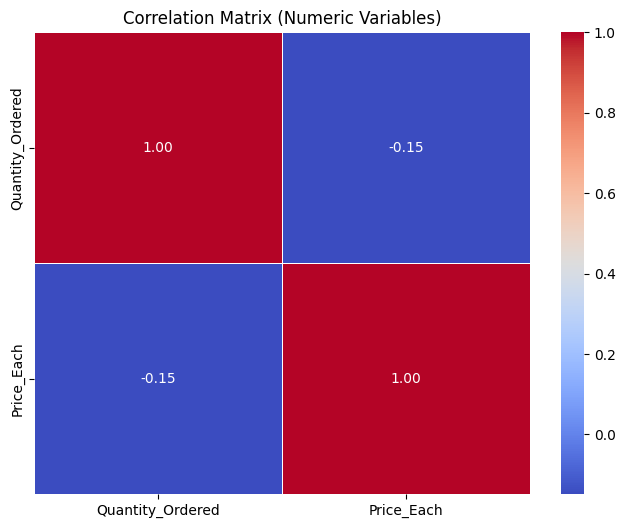

In [ ]:

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Numeric Variables)')
plt.show()